# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | flin flon
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | talara
Processing Record 13 of Set 1 | hammerfest
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | columbus
Processing Record 17 of Set 1 | colares
Processing Record 18 of Set 1 | tulun
Processing Record 19 of Set 1 | san pedro pochutla
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipp

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,16.84,99,0,0.45,ZA,1731381504
1,flin flon,54.7682,-101.8650,1.09,69,100,5.97,CA,1731381032
2,stanley,54.8680,-1.6985,2.87,95,55,1.54,GB,1731381506
3,blackmans bay,-43.0167,147.3167,20.20,60,0,0.45,AU,1731381507
4,nar'yan-mar,67.6713,53.0870,-10.98,96,79,2.23,RU,1731381508


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.84,99,0,0.45,ZA,1731381504
1,flin flon,54.7682,-101.8650,1.09,69,100,5.97,CA,1731381032
2,stanley,54.8680,-1.6985,2.87,95,55,1.54,GB,1731381506
3,blackmans bay,-43.0167,147.3167,20.20,60,0,0.45,AU,1731381507
4,nar'yan-mar,67.6713,53.0870,-10.98,96,79,2.23,RU,1731381508


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

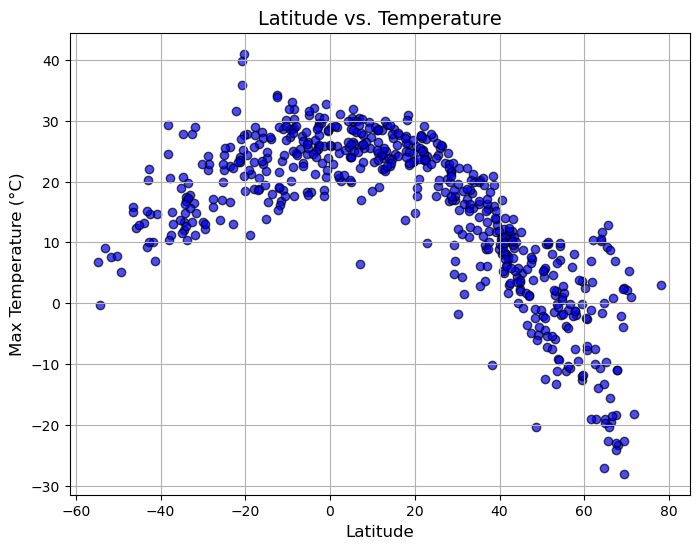

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, temperature, color='blue', edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°C)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

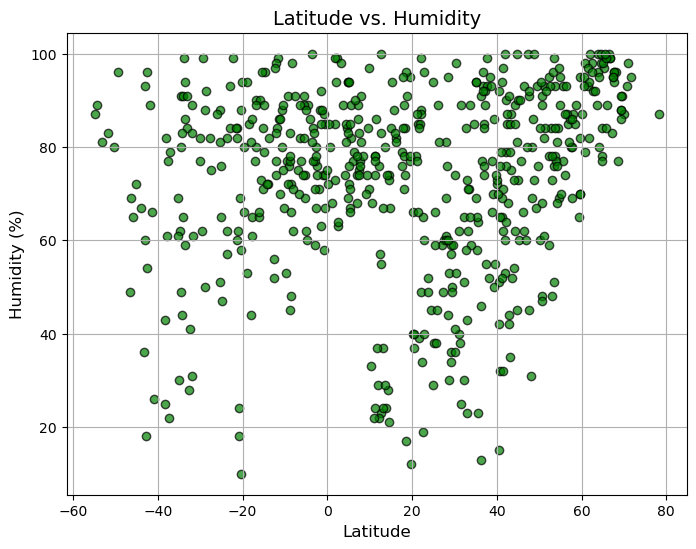

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, color='green', edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

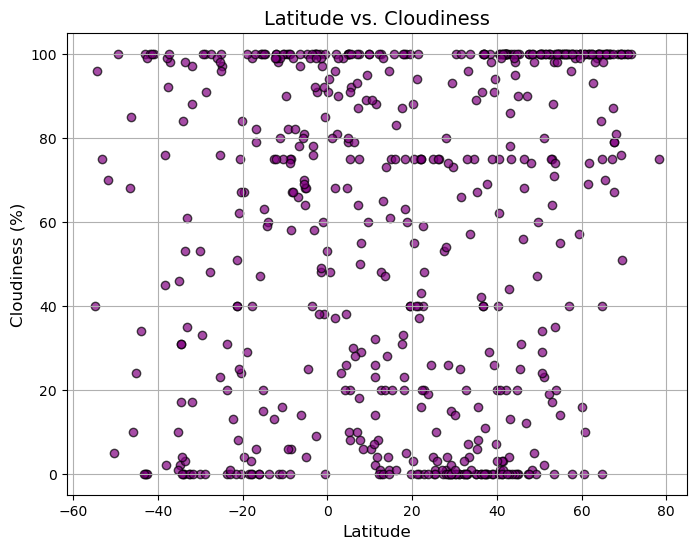

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.figure(figsize=(8, 6)) 
plt.scatter(latitude, cloudiness, color='purple', edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

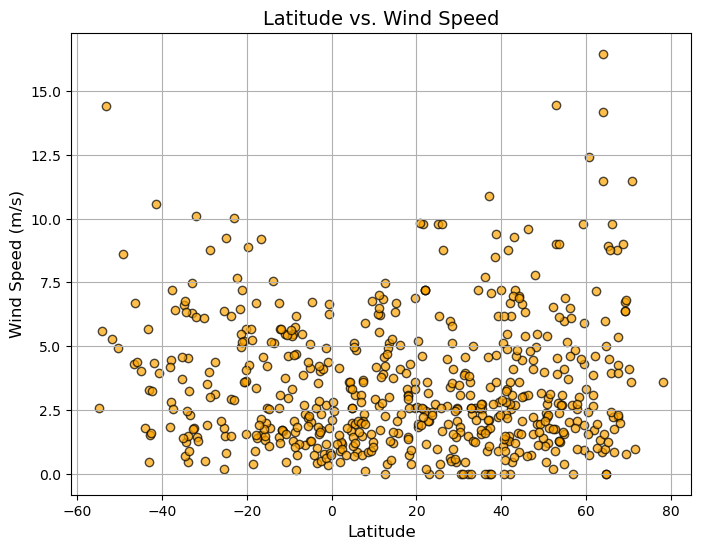

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, wind_speed, color='orange', edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, output_file):
    """
    This function creates a scatter plot with a linear regression line and saves it as a PNG file.
    
    Parameters:
    - x: Array of x-axis data (independent variable).
    - y: Array of y-axis data (dependent variable).
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - title: Title of the plot.
    - output_file: Path to save the output plot as PNG.
    """
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.7)
    line = slope * x + intercept
    plt.plot(x, line, color='red', linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.2f}"
    plt.text(min(x), max(y), f"{equation}\n{r_squared}", fontsize=12, color='black')
    plt.savefig(output_file)
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flin flon,54.7682,-101.8650,1.09,69,100,5.97,CA,1731381032
2,stanley,54.8680,-1.6985,2.87,95,55,1.54,GB,1731381506
4,nar'yan-mar,67.6713,53.0870,-10.98,96,79,2.23,RU,1731381508
6,bilibino,68.0546,166.4372,-23.38,96,81,1.99,RU,1731381510
8,albany,42.6001,-73.9662,11.11,68,100,0.45,US,1731381291


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.84,99,0,0.45,ZA,1731381504
3,blackmans bay,-43.0167,147.3167,20.20,60,0,0.45,AU,1731381507
5,port-aux-francais,-49.3500,70.2167,5.12,96,100,8.62,TF,1731381509
7,puerto natales,-51.7236,-72.4875,7.60,83,70,5.27,CL,1731381511
9,grytviken,-54.2811,-36.5092,-0.29,89,96,5.59,GS,1731381514


###  Temperature vs. Latitude Linear Regression Plot

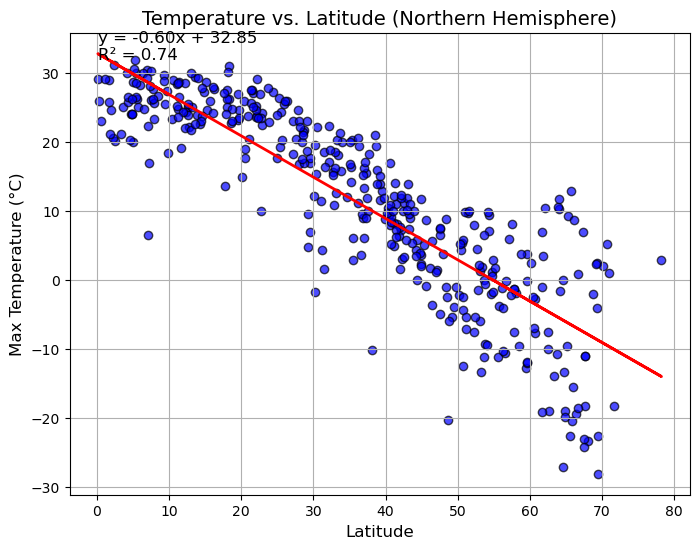

In [17]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
latitude_north = northern_hemi_df['Lat']
temperature_north = northern_hemi_df['Max Temp']
create_linear_regression_plot(
    latitude_north, 
    temperature_north, 
    'Latitude', 
    'Max Temperature (°C)', 
    'Temperature vs. Latitude (Northern Hemisphere)', 
    'output_data/temp_vs_latitude_north.png'
)

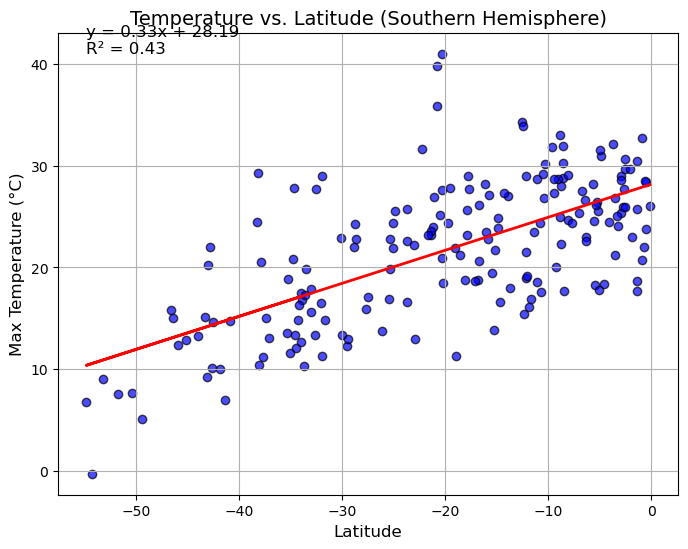

In [18]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
latitude_south = southern_hemi_df['Lat']
temperature_south = southern_hemi_df['Max Temp']
create_linear_regression_plot(
    latitude_south, 
    temperature_south, 
    'Latitude', 
    'Max Temperature (°C)', 
    'Temperature vs. Latitude (Southern Hemisphere)', 
    'output_data/temp_vs_latitude_south.png'
)

**Discussion about the linear relationship:** The linear relationship shows higher maximum temperatures closer to the equator and decreases as latitude gets further from the equator.

### Humidity vs. Latitude Linear Regression Plot

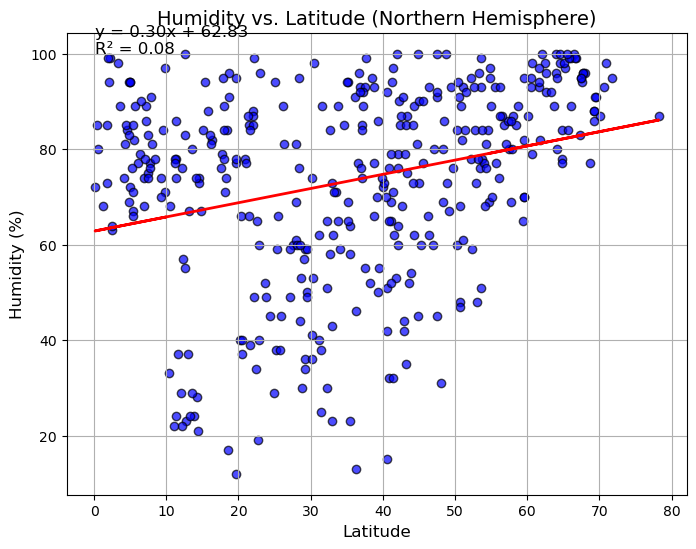

In [19]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
latitude_north = northern_hemi_df['Lat']
humidity_north = northern_hemi_df['Humidity']
create_linear_regression_plot(
    latitude_north, 
    humidity_north, 
    'Latitude', 
    'Humidity (%)', 
    'Humidity vs. Latitude (Northern Hemisphere)', 
    'output_data/humidity_vs_latitude_north.png'
)

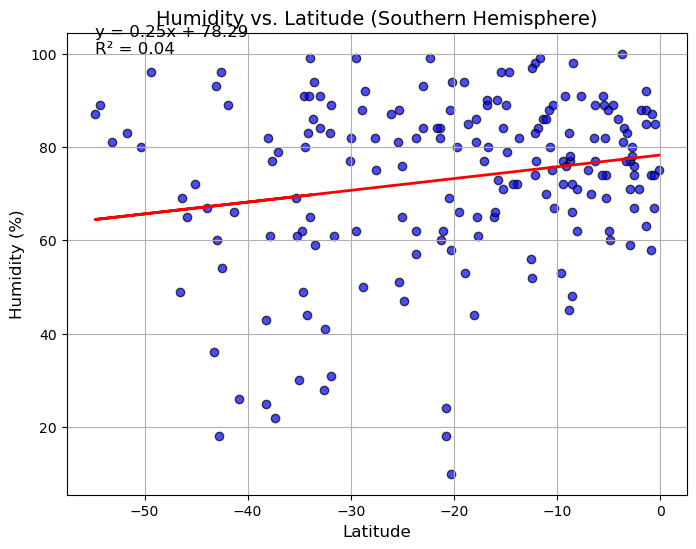

In [20]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
latitude_south = southern_hemi_df['Lat']
humidity_south = southern_hemi_df['Humidity']
create_linear_regression_plot(
    latitude_south, 
    humidity_south, 
    'Latitude', 
    'Humidity (%)', 
    'Humidity vs. Latitude (Southern Hemisphere)', 
    'output_data/humidity_vs_latitude_south.png'
)

**Discussion about the linear relationship:** There is not a strong linear relationship between humidity and latitude for either the Northern or Southern Hemispheres in this data.

### Cloudiness vs. Latitude Linear Regression Plot

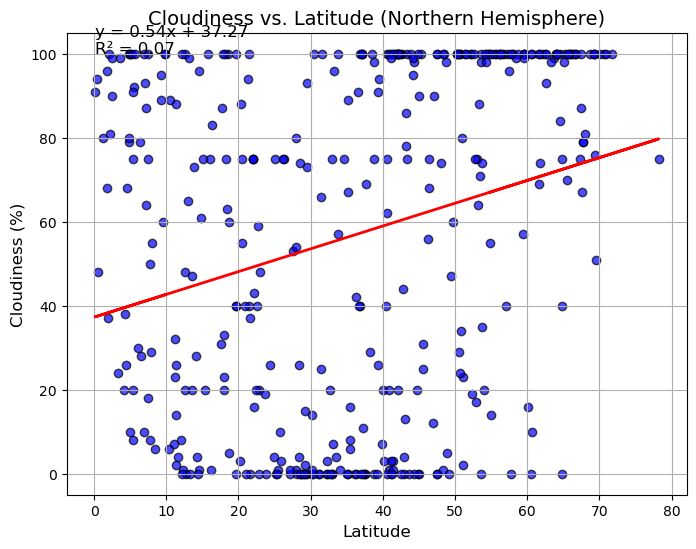

In [21]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
latitude_north = northern_hemi_df['Lat']
cloudiness_north = northern_hemi_df['Cloudiness']
create_linear_regression_plot(
    latitude_north, 
    cloudiness_north, 
    'Latitude', 
    'Cloudiness (%)', 
    'Cloudiness vs. Latitude (Northern Hemisphere)', 
    'output_data/cloudiness_vs_latitude_north.png'
)

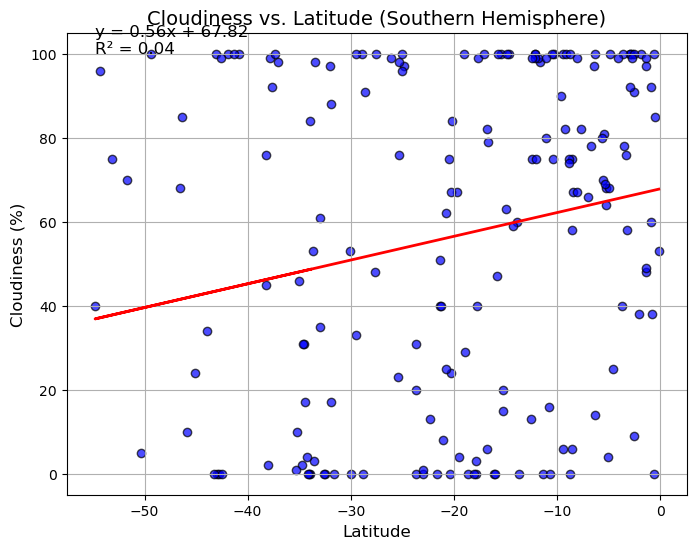

In [22]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
latitude_south = southern_hemi_df['Lat']
cloudiness_south = southern_hemi_df['Cloudiness']
create_linear_regression_plot(
    latitude_south, 
    cloudiness_south, 
    'Latitude', 
    'Cloudiness (%)', 
    'Cloudiness vs. Latitude (Southern Hemisphere)', 
    'output_data/cloudiness_vs_latitude_south.png'
)

**Discussion about the linear relationship:** There is not a strong pattern of cloudiness as the latitude changes, but there is a larger pattern of 0% cloudiness or 100% cloudiness, not as much cloudiness percentage in between 0% and 100%.

### Wind Speed vs. Latitude Linear Regression Plot

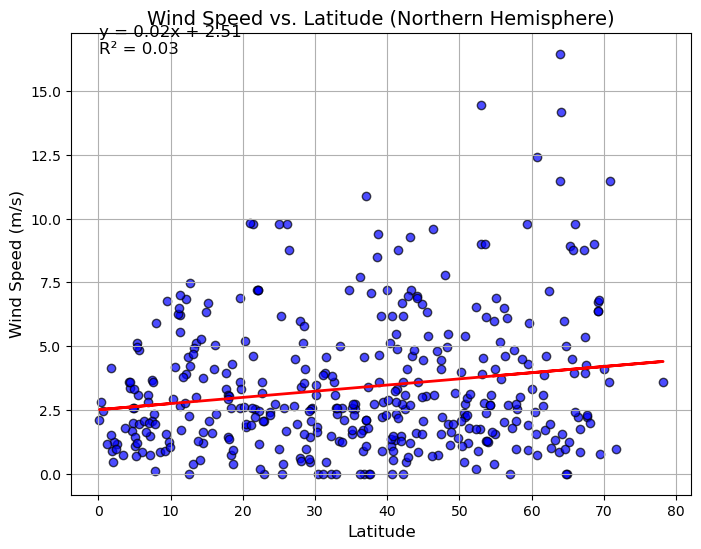

In [23]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
latitude_north = northern_hemi_df['Lat']
wind_speed_north = northern_hemi_df['Wind Speed']
create_linear_regression_plot(
    latitude_north, 
    wind_speed_north, 
    'Latitude', 
    'Wind Speed (m/s)', 
    'Wind Speed vs. Latitude (Northern Hemisphere)', 
    'output_data/wind_speed_vs_latitude_north.png'
)

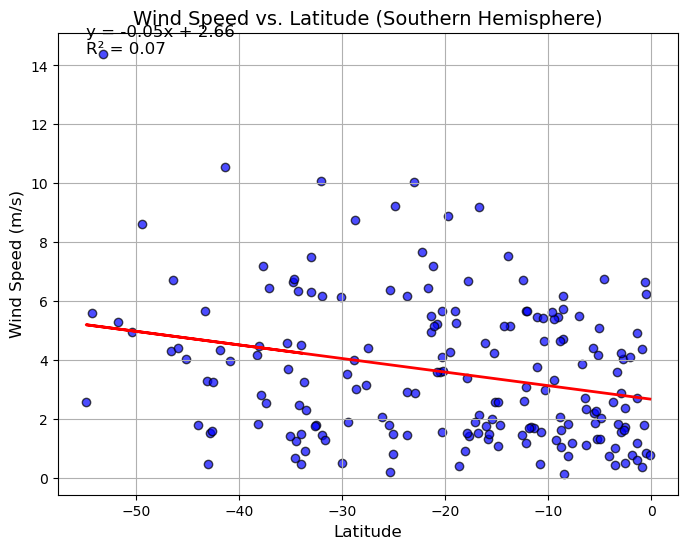

In [24]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
latitude_south = southern_hemi_df['Lat']
wind_speed_south = southern_hemi_df['Wind Speed']
create_linear_regression_plot(
    latitude_south, 
    wind_speed_south, 
    'Latitude', 
    'Wind Speed (m/s)', 
    'Wind Speed vs. Latitude (Southern Hemisphere)', 
    'output_data/wind_speed_vs_latitude_south.png'
)

**Discussion about the linear relationship:** Based on the linear relationship in both plots, the wind speeds are slower closer to the equator. As latitude gets further from the equator, there are more outliers for higher wind speeds.